### Quantile Analysis
https://classroom.udacity.com/nanodegrees/nd880/parts/9a3a9589-7bc6-4694-81e0-8c3cb1aea251/modules/1976c245-f4ec-42bf-9611-180753a3a4df/lessons/a9a173b4-c01a-4919-b9b2-77f5b651b3be/concepts/9d66a147-eee6-4deb-9174-050f7d96ba40

In [2]:
# Imports
from quantopian.pipeline.data import Fundamentals
from quantopian.pipeline.data import morningstar as mstar
from quantopian.pipeline.factors import AverageDollarVolume
from quantopian.pipeline.factors.morningstar import MarketCap
from quantopian.pipeline.classifiers.morningstar import Sector
from quantopian.pipeline.data.builtin import USEquityPricing
from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline

from quantopian.pipeline.factors import SimpleMovingAverage
from quantopian.pipeline.factors import Returns
from zipline.pipeline.factors import DailyReturns

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import time

from quantopian.pipeline.experimental import QTradableStocksUS

### Pipeline construction using QTradableStocksUS

In [6]:
def make_pipeline():
    average_day_dv_200 = AverageDollarVolume(window_length = 200)
    market_cap = Fundamentals.market_cap.latest
    price = USEquityPricing.close.latest
    volume = USEquityPricing.volume.latest
    sector = Sector()
    daily_returns = DailyReturns(inputs = [USEquityPricing.close])
    
    # Ranked Returns
    returns = Returns(window_length = 252)
    ranked_returns = returns.rank()
    
    # New Factors
    # create a factor of 1 year returns, demeaned by sector, rank, zscore
    factor = (
    Returns(window_length=252).\
    demean(groupby=Sector()).\
    rank().
    zscore()
    )
    
    # use the newly created factor as a input into SimpleMovingAverage, with windowlength = 5
    factor_smoothed = (SimpleMovingAverage(inputs = [factor], window_length=5).\
                      rank().
                      zscore()
                      )
    
    return Pipeline(
        columns = {
            'AverageDollarVolume':average_day_dv_200,
            'MarketCap':market_cap,
            'Price':price,
            'Volume':volume,
            'Sector':sector,
            '1yrReturns':factor,
            '5dAvgReturns':factor_smoothed,
            'ranked_return':ranked_returns,
            '1dReturns':daily_returns
        },
        screen = QTradableStocksUS()
    )
    

In [7]:
# pipeline is run over this time rang and outpts a data frame indexed by asset name:
start_date = '2017'
end_date = '2019-08-02'

QTU_pipeline2 = run_pipeline(make_pipeline(), start_date, end_date, chunksize=252)

In [10]:
# lets see what stocks had the most gains ytd through Aug 2nd
leading_ytd_stocks = QTU_pipeline2.sort_values(by=['ranked_return'], ascending = False)
leading_ytd_stocks.filter(like='2019-08-02', axis = 0).head(25)

1dReturns  1yrReturns  \
2019-08-02 00:00:00+00:00 Equity(49607 [AXSM])   0.018846    1.729817   
                          Equity(42749 [ENPH])   0.069627    1.725988   
                          Equity(32726 [EHTH])  -0.012531    1.720882   
                          Equity(32215 [APPS])   0.027599    1.718330   
                          Equity(50735 [AYX])    0.120985    1.711948   
                          Equity(50477 [IIPR])  -0.036067    1.712586   
                          Equity(48628 [NVTA])   0.011165    1.714501   
                          Equity(50288 [TTD])    0.004899    1.708757   
                          Equity(50411 [RARX])  -0.032021    1.711310   
                          Equity(31341 [ZIOP])  -0.025937    1.705566   
                          Equity(51314 [MDB])    0.004120    1.700460   
                          Equity(50449 [INSG])  -0.048170    1.697908   
                          Equity(50758 [OKTA])   0.017274    1.695993   
                          Equity(4549 [LSCC])   -0.001552    1.693440   
                          Equity(49060 [SHOP])   0.074229    1.692164   
                          Equity(45758 [VCYT])  -0.046610    1.701099   
                          Equity(49460 [NVCR])   0.032223    1.699184   
                          Equity(51961 [SMAR])   0.001202    1.685782   
                          Equity(51832 [ZS])     0.011867    1.685144   
                          Equity(44991 [NSTG])  -0.126945    1.694078   
                          Equity(47321 [CDNA])   0.036314    1.692802   
                          Equity(50077 [TWLO])  -0.008914    1.680676   
                          Equity(48254 [WK])     0.013572    1.671104   
                          Equity(47779 [CYBR])  -0.003242    1.670465   
                          Equity(45429 [FATE])  -0.030413    1.688973   

                                                5dAvgReturns  \
2019-08-02 00:00:00+00:00 Equity(49607 [AXSM])      1.729251   
                          Equity(42749 [ENPH])      1.720539   
                          Equity(32726 [EHTH])      1.723650   
                          Equity(32215 [APPS])      1.719917   
                          Equity(50735 [AYX])       1.707472   
                          Equity(50477 [IIPR])      1.716183   
                          Equity(48628 [NVTA])      1.713072   
                          Equity(50288 [TTD])       1.711205   
                          Equity(50411 [RARX])      1.713694   
                          Equity(31341 [ZIOP])      1.703116   
                          Equity(51314 [MDB])       1.696893   
                          Equity(50449 [INSG])      1.704983   
                          Equity(50758 [OKTA])      1.695027   
                          Equity(4549 [LSCC])       1.678848   
                          Equity(49060 [SHOP])      1.662669   
                          Equity(45758 [VCYT])      1.706227   
                          Equity(49460 [NVCR])      1.695649   
                          Equity(51961 [SMAR])      1.685070   
                          Equity(51832 [ZS])        1.681337   
                          Equity(44991 [NSTG])      1.706849   
                          Equity(47321 [CDNA])      1.702494   
                          Equity(50077 [TWLO])      1.683204   
                          Equity(48254 [WK])        1.676981   
                          Equity(47779 [CYBR])      1.673870   
                          Equity(45429 [FATE])      1.699382   

                                                AverageDollarVolume  \
2019-08-02 00:00:00+00:00 Equity(49607 [AXSM])         1.541528e+07   
                          Equity(42749 [ENPH])         2.810533e+07   
                          Equity(32726 [EHTH])         2.175493e+07   
                          Equity(32215 [APPS])         3.525766e+06   
                          Equity(50735 [AYX])          6.546713e+07   
                          Equity(50477 [IIPR])         2.4

In [13]:
# lets see what stocks had the most gains today...
# a bit disappointing, xchecking the prices against yahoo finance seems like the prices are 1 day stale
leading_daily_stocks = QTU_pipeline2.sort_values(by=['1dReturns'], ascending = False)
leading_daily_stocks.filter(like='2019-08-02', axis = 0).head(25)

1dReturns  1yrReturns  \
2019-08-02 00:00:00+00:00 Equity(13698 [MYGN])   0.550978    0.827415   
                          Equity(28326 [VNDA])   0.269076   -0.520445   
                          Equity(20359 [EGOV])   0.246968    1.373706   
                          Equity(27817 [SPWR])   0.241574    1.631536   
                          Equity(7130 [STAA])    0.188673    1.092902   
                          Equity(26322 [ACAD])   0.167277    1.648767   
                          Equity(1882 [CRUS])    0.166564    1.195651   
                          Equity(46695 [FIVN])   0.165789    1.599626   
                          Equity(3424 [AJRD])    0.136204    1.494963   
                          Equity(48629 [INOV])   0.132000    1.512194   
                          Equity(49437 [COOP])   0.122208   -1.410722   
                          Equity(18490 [SRDX])   0.121975   -0.457264   
                          Equity(50735 [AYX])    0.120985    1.711948   
                          Equity(44466 [EVTC])   0.118088    1.479646   
                          Equity(9189 [KGC])     0.115000    1.370516   
                          Equity(8586 [ALG])     0.113801    1.172038   
                          Equity(22072 [TTMI])   0.113658   -1.276063   
                          Equity(20425 [PRFT])   0.108804    1.401787   
                          Equity(24572 [NKTR])   0.096242   -1.075671   
                          Equity(13083 [PAAS])   0.095458    0.840179   
                          Equity(4192 [K])       0.093643   -0.863792   
                          Equity(24094 [MGPI])   0.092519   -1.394767   
                          Equity(44156 [AGI])    0.088685    1.459862   
                          Equity(46648 [TWOU])   0.087500   -1.718330   
                          Equity(16661 [TIVO])   0.085639   -1.129279   

                                                5dAvgReturns  \
2019-08-02 00:00:00+00:00 Equity(13698 [MYGN])     -0.573098   
                          Equity(28326 [VNDA])     -0.971965   
                          Equity(20359 [EGOV])      0.691327   
                          Equity(27817 [SPWR])      1.530751   
                          Equity(7130 [STAA])       0.383932   
                          Equity(26322 [ACAD])      1.604799   
                          Equity(1882 [CRUS])       0.719951   
                          Equity(46695 [FIVN])      1.443635   
                          Equity(3424 [AJRD])       1.507105   
                          Equity(48629 [INOV])      1.472881   
                          Equity(49437 [COOP])     -1.474126   
                          Equity(18490 [SRDX])     -0.808311   
                          Equity(50735 [AYX])       1.707472   
                          Equity(44466 [EVTC])      1.278115   
                          Equity(9189 [KGC])        1.247002   
                          Equity(8586 [ALG])        0.893560   
                          Equity(22072 [TTMI])     -1.372075   
                          Equity(20425 [PRFT])      1.225845   
                          Equity(24572 [NKTR])     -1.123795   
                          Equity(13083 [PAAS])      0.448647   
                          Equity(4192 [K])         -1.078993   
                          Equity(24094 [MGPI])     -1.312961   
                          Equity(44156 [AGI])       1.340963   
                          Equity(46648 [TWOU])     -1.619111   
                          Equity(16661 [TIVO])     -1.232068   

                                                AverageDollarVolume  \
2019-08-02 00:00:00+00:00 Equity(13698 [MYGN])         2.276041e+07   
                          Equity(28326 [VNDA])         1.080473e+07   
                          Equity(20359 [EGOV])         4.080842e+06   
                          Equity(27817 [SPWR])         1.458094e+07   
                          Equity(7130 [STAA])          1.115727e+07   
                          Equity(26322 [ACAD])         2.8

### Create indiviaual DataFrames

In [15]:
df_momentum = QTU_pipeline2[['1yrReturns', '5dAvgReturns']]
df_price = QTU_pipeline2[['Price']]
df_returns = QTU_pipeline2[['1dReturns']]

df_price = df_price.Price.unstack().fillna(0)
df_returns = df_returns['1dReturns'].unstack().fillna(0)

### Evaluate Factors
We'll go over some tools we can use to evaluate alpha factors, to do so we will use the alphalens library

### Import Alphalens

In [17]:
import alphalens as al

### Prepare the data for use in alphalens

In [22]:
factor_names = df_momentum.columns

# use a dictionary to store each dataframe, one for each factor and its associated forward return
factor_data = {}
for factor_name in factor_names:
    print("formatting factor data for: " + factor_name)
    # get clean factor and forward returns for each factor
    # choose a single period returns (daily returns)
    factor_data[factor_name] = al.utils.get_clean_factor_and_forward_returns(
        factor = df_momentum[factor_name],
        prices = df_price,
        periods = [1]
    
    )

formatting factor data for: 1yrReturns
Dropped 1.3% entries from factor data: 1.3% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
formatting factor data for: 5dAvgReturns
Dropped 1.3% entries from factor data: 1.3% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


## quantile analysis

Alphalens [mean_return_by_quantile documentation.](https://quantopian.github.io/alphalens/alphalens.html#alphalens.performance.mean_return_by_quantile)

```
alphalens.performance.mean_return_by_quantile(factor_data,
                                              ...
                                              demeaned = True,
                                              ...)
```
* factor_data : A MultiIndex DataFrame indexed by date ( level 0 ) and asset (level 1), containing the values for a single alpha factor, forward returns for each period, the factor quantile, bin that factor value belongs to, and (optionally) the group the asset belongs to
* demeaned: this is True by default. This make a clal to [alphalens.utils.demean_forward_returns](https://quantopian.github.io/alphalens/alphalens.html#alphalens.utils.demean_forward_returns), which takes each factor return and subtracts the mean of all the factor returns in our universe of stocks.
* returns: mean_ret: pd.DataFrame: Mean period wise returns by specified factor quantile.
* Note that it returns a second variable, standard error of the returns. We will focus on the mean return.

### Quiz 1
Look at the error message when trying to call `mean_return_by_quantile` function, passing in the factor data. What data type is required?

In [26]:
factor_names = df_momentum.columns
ls_qr = []

for i, factor_name in enumerate(factor_names):
    print("Calculating the FRA for: " + factor_name)
    
    #TODO: look at the error generated from this line of code
    quantile_return, quantile_stderr = al.performance.mean_return_by_quantile(factor_data[factor_name])
    quantile_return.columns = [factor_name]
    ls_qr.append(quantile_return)
    
df_ls_qr = pd.concat(ls_qr, axis=1)

Calculating the FRA for: 1yrReturns
Calculating the FRA for: 5dAvgReturns


### View the outputted Quantile

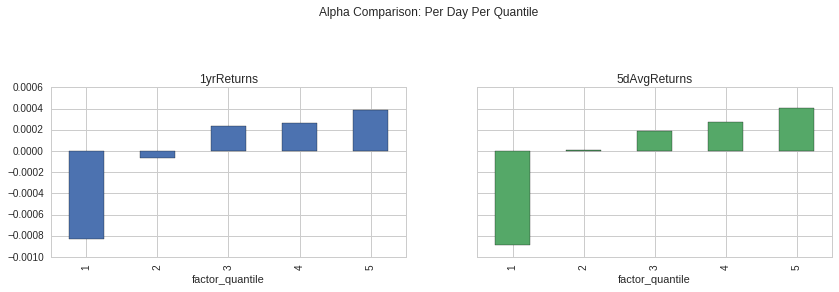

In [27]:
df_ls_qr.plot.bar(
    subplots = True,
    sharey = True,
    layout = (4,2),
    figsize=(14,14),
    legend = False,
    title = 'Alpha Comparison: Per Day Per Quantile'
);

### Quiz 3 
how would you compare the quantile returns of the unsmoothed and smoothed factors? Which one would you prefer based on just the quantil returns?

### Answer 3:
The 1yr returns appears to have a more balanced distribution (more of the predictive power is distributed across more of the stocks in the portfolio). The 5d avg returns appears to generate most of its returns fromt eh tails ( the highest and lowest quantiles). We'd prefer the 1yr returns factor because it relies on more of hte stocks in the portfolio for the returns, instead of just the tail ends of hte distrubition of stocks.

### Quiz 4 basis points
Notice how the y-axis has pretty small numbers for the percentages. We normally use basis points as the unit of measurement. To convert from decimal (e.g. 0.01 is 1%) to basis points, multiply by $10^4$

### Answer 4

In [28]:
# ToDo: convert values to basis points
df_ls_qr_bp = 10e4 * df_ls_qr
df_ls_qr_bp

,1yrReturns,5dAvgReturns
factor_quantile,,
1,-82.522094,-88.599518
2,-6.178826,0.821213
3,23.162732,19.331047
4,26.758176,27.706763
5,38.863458,40.826342


### re-plot using basis point scaling

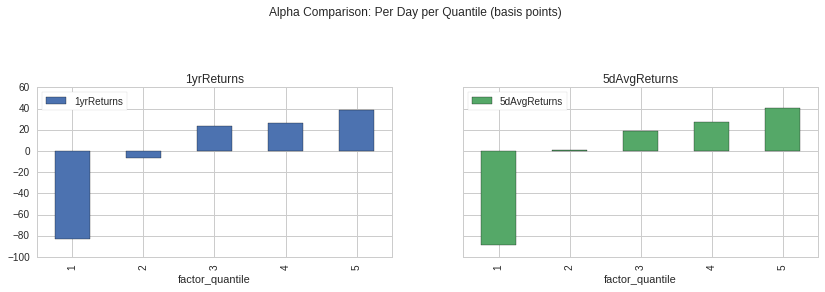

In [31]:
df_ls_qr_bp.plot.bar(
    subplots=True,
    sharey=True,
    layout = (4,2),
    figsize = (14,14),
    title = "Alpha Comparison: Per Day per Quantile (basis points)"
    
);